VMC optimization in CASINO can be performed only a fixed number of steps.
Therefore it is important to estimate what maximum number of optimization steps is necessary for such simple systems as H-Ne atoms.
VMC energy in every optimization step.

<IPython.core.display.Javascript object>


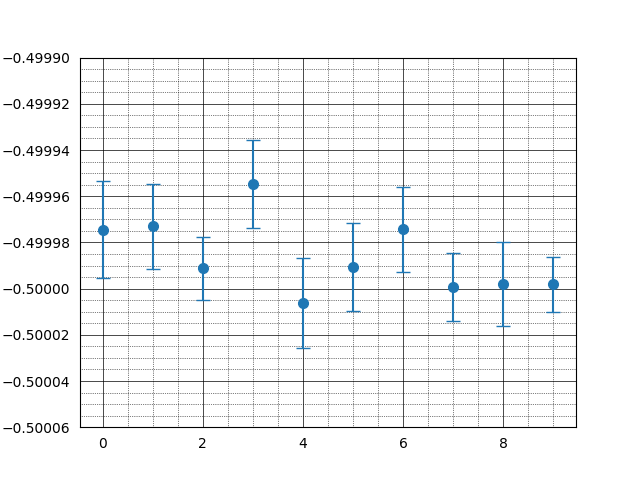

In [18]:
import re
import os
import numpy as np
from math import sqrt
from functools import partial

def vmc_energy(*path):
    """Get VMC energy without JASTROW optimisation.
     -152.988424660763 +/- 0.003047553900      Correlation time method
    """

    regexp = re.compile(' (?P<energy>[-+]?\d+\.\d+) \+/- (?P<energy_error>[-+]?\d+\.\d+)      Correlation time method')

    with open(os.path.join(*path, 'out'), 'r') as vmc_out:
        result = re.findall(regexp, vmc_out.read())
        return list(map(list, map(partial(map, float), result)))

energy = {}
for atom in ['H', 'He', 'Li', 'Be', 'B']:    
    energy[atom] = (vmc_energy('HF', 'cc-pVQZ', atom, 'VMC_OPT', 'emin', '8_8_44_simple'))
    

x = range(len(energy['H']))
y = [energy[0] for energy in energy['H']]
yerr = [energy[1] for energy in energy['H']]

%matplotlib notebook
import matplotlib.pyplot as plt
fig, axes = plt.subplots(num='H VMC energy vs opt. step')
axes.errorbar(x, y, yerr, marker='o', ms=7, capsize=5, ls='none')
axes.set_ylim(ymin=-0.50006, ymax=-0.49990)
axes.minorticks_on()
axes.ticklabel_format(useOffset=False)
axes.grid(which='major', linestyle='-', linewidth=0.5, color='black')
axes.grid(which='minor', linestyle=':', linewidth=0.5, color='black')
axes.tick_params(which='both', top=False, left=False, right=False, bottom=False)
fig.show()

<IPython.core.display.Javascript object>


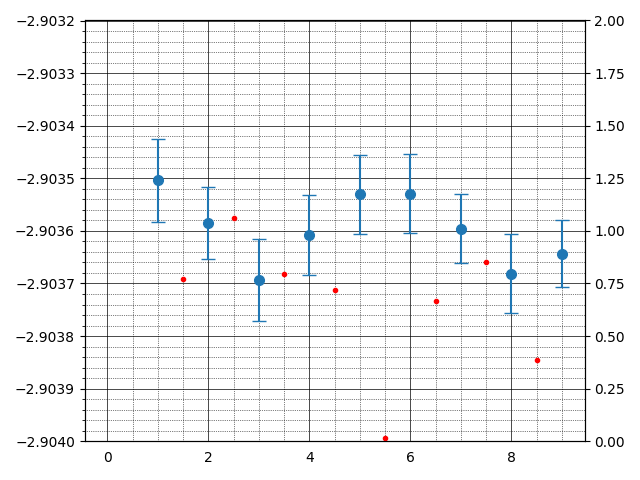

In [26]:
x = range(len(energy['He']))
y = [energy[0] for energy in energy['He']]
yerr = [energy[1] for energy in energy['He']]

z_test = [abs(E0[0] - E1[0])/sqrt(E0[1]**2 + E1[1]**2) for E0, E1 in zip(energy['He'], energy['He'][1:])]

import matplotlib.pyplot as plt
fig, axes1 = plt.subplots(num='He VMC energy vs opt. step')
axes1.errorbar(x, y, yerr, marker='o', ms=7, capsize=5, ls='none')
axes1.set_ylim(ymin=-2.904, ymax=-2.9032)
axes1.minorticks_on()
axes1.ticklabel_format(useOffset=False)
axes1.grid(which='major', linestyle='-', linewidth=0.5, color='black')
axes1.grid(which='minor', linestyle=':', linewidth=0.5, color='black')
axes1.tick_params(which='both', top=False, left=False, right=False, bottom=False)
axes2 = axes1.twinx()
axes2.plot(np.arange(0.5, len(energy['He'])-1), z_test, 'r.')
axes2.set_ylim(ymin=0.0, ymax=2.0)
fig.tight_layout()
fig.show()

<IPython.core.display.Javascript object>


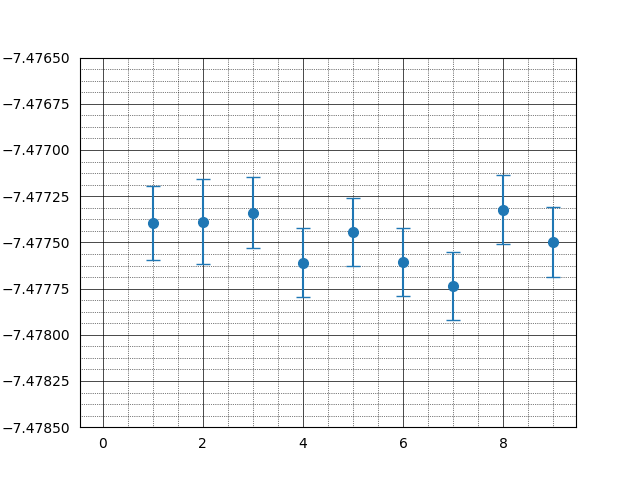

In [21]:
x = range(len(energy['Li']))
y = [energy[0] for energy in energy['Li']]
yerr = [energy[1] for energy in energy['Li']]

import matplotlib.pyplot as plt
fig, axes = plt.subplots(num='LI VMC energy vs opt. step')
axes.errorbar(x, y, yerr, marker='o', ms=7, capsize=5, ls='none')
axes.set_ylim(ymin=-7.4785, ymax=-7.4765)
axes.minorticks_on()
axes.ticklabel_format(useOffset=False)
axes.grid(which='major', linestyle='-', linewidth=0.5, color='black')
axes.grid(which='minor', linestyle=':', linewidth=0.5, color='black')
axes.tick_params(which='both', top=False, left=False, right=False, bottom=False)
fig.show()